#  Integración de Ecuaciones Diferenciales Ordinarias
(Material extraido de curso de H. Reid y de la fantástica página web
http://calculuswithjulia.github.io/)

En esta clase discutiremos posibles aproximaciones de soluciones de ecuaciones diferenciales ordinarias.
Para tal fin, (y practicar Julia), utilizaremos algunos paquetes para resolver soluciones sencillas. 
Luego pasaremos a estudiar el Método de Euler.

Supongamos que queremos resolver la ecuación diferencial en variables separables $$y'(x)=y(x)\cdot 
x, \quad y(1)=1.$$

Podemos utilizar el paquete SymPy para esto.


In [11]:
using SymPy
t, y = symbols("t, y")
u = SymFunction("u")
t0, y0 = 1, 1
F(y,t) = y*t

dsolve(u'(t) - F(u(t),t))

            2
           t 
           ──
           2 
u(t) = C₁⋅ℯ  

In [12]:
out = dsolve(u'(t) - F(u(t),t), t, (u, t0, y0))

               2
              t 
              ──
        -1/2  2 
u(t) = ℯ    ⋅ℯ  

In [6]:
? VectorField

search: VectorField



`VectorField(fx, fy`): create an object that can be `plot`ted as a vector field.

A vectorfield plot draws arrows at grid points proportional to `[fx(x_i,y_i), fy(x_i,y_i)]` to visualize the field generated by `[fx, fy]`.

The plot command: `plot(VectorField(fx, fy), xlims=(-5,5), ylims=(-5,5), n=8)` will draw the vectorfield. This uses the default values, so the same graph would be rendered by `plot(VectorField(fx,fy))`.

To faciliate the visualization of solution to the ODE y' = F(x, y(x)), the call `plot(VectorField(F))` will work. (The order is x then y, though often this is written as F(y(x),x).)

`SymPy` objects can be passed to `VectorField`, but this is a bit fragile, as they must each have two variables so that they can be called with two variables.  (E.g., `y(1,2)` will be `1` not `2`, as might be intended.)

Examples:

```
using Plots

fx(x,y) = sin(y); fy(x,y) = cos(y)
plot(VectorField(fx, fy), xlims=(-2pi, 2pi), ylims=(-2pi,2pi))

# plot field of y' = 3y*x over (-5,5) x (-5,5)
F(x,y) = 3*y*x
plot(VectorField(F))

# plot field and solution u' = u*(1-u)
u = SymFunction("u"); @vars x
F(x,y) = y*(1-y)
out = dsolve(u'(x) - F(x, u(x)), x, (u, 0, 1))
plot(VectorField(F), xlims=(0,5), ylims=(0,2))
plot!(rhs(out))
```


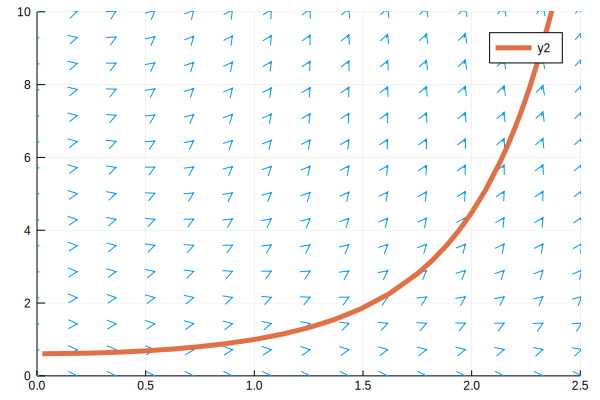

In [14]:
using Plots
plot(VectorField((t,y) -> F(y,t)), xlims=(0,2.5), ylims=(0,10), n=15)
plot!(rhs(out),  linewidth=5)

Como era de esperar, el campo de vectores acompaña a la solución. Veamos el siguiente método numérico para aproximar soluciones de ecuaciones diferenciales.


# Método de Euler
Siguiendo los apuntes del curso veamos un ejemplo.
Resumiendo, si  tenemos la ecuación diferencial 
$$
\frac{dy}{dt}=F(y,t)
$$
entonces el método se define de manera recurrente, con salto $\Delta t=h$, por
$$
t_{n+1}=t_n+h,\quad u_{n+1}=u_n+ h F(u_n,t_n).
$$


In [26]:
n=10
h = 1/n
ts = zeros(n+1)
ys = zeros(n+1)
ts[1] = t0  
ys[1] = y0
for i in 1:n
  ts[i + 1] = ts[i] + h
  ys[i + 1] = ys[i] + h * F(ys[i], ts[i])
end

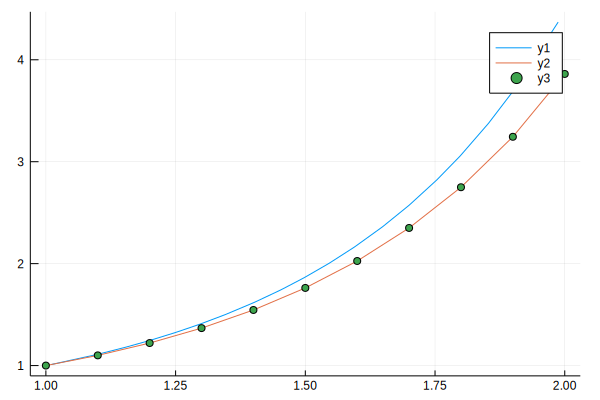

In [27]:
# Realicemos un gráfico para ver la aproximación

plot(exp(-1/2)*exp(t^2/2), t0, 2) #Definir labels!
plot!(ts, ys)
scatter!(ts, ys)

In [48]:
# La siguiente función define la interpolación lineal entre un conjunto de vectores
function linterp(xs, ys)
    function(x)
        ((x < xs[1]) || (x > xs[end])) && return NaN
        for i in 1:(length(xs) - 1)
            if xs[i] <= x < xs[i+1]
                l = (x-xs[i]) / (xs[i+1] - xs[i])
                return (1-l) * ys[i] + l * ys[i+1]
            end
        end
        ys[end]
    end
    end 

linterp (generic function with 1 method)

In [39]:
function euler(F, x0, xn, y0, n)
  h = (xn - x0)/n
  xs = zeros(n+1)
  ys = zeros(n+1)
  xs[1] = x0
  ys[1] = y0
  for i in 1:n
    xs[i + 1] = xs[i] + h
    ys[i + 1] = ys[i] + h * F(ys[i], xs[i])
  end
    linterp(xs, ys)
end

euler (generic function with 1 method)

In [40]:
euler(F,1,2,1,40)

#11 (generic function with 1 method)

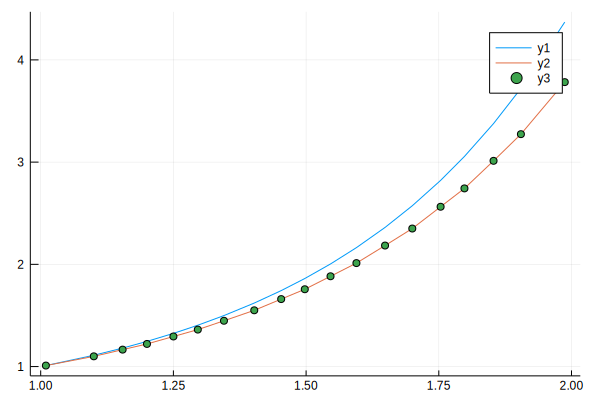

In [46]:
u = euler(F, 1, 2, 1, 10)
plot(exp(-1/2)*exp(t^2/2), t0, 2)
plot!(u,t0,2)
scatter!(u, t0, 2)

Veamos un ejemplo sin solución exacta. 
Supongamos que queremos aproximar las soluciones de la ecuación diferencial
$$
y'=\sin (t\cdot y)
$$

In [49]:
t = symbols("t")
u = SymFunction("u")
F(y,t) = sin(t*y)
eqn = u'(t) - F(u(t), t)
out = dsolve(eqn)

                2       4 ⎛    2    ⎞        
            C₁⋅t    C₁⋅t ⋅⎝- C₁  + 3⎠    ⎛ 6⎞
u(t) = C₁ + ───── + ───────────────── + O⎝t ⎠
              2             24               

Como pueden apreciar, el paquete SymPy retorna la solución en forma de serie de potencia aproximada. Veamos ahora el método de Euler en acción.

In [50]:
# Tomemos condición inicial y(0)=1
out = dsolve(eqn, t, (u, 0, 1))

            2    4        
           t    t     ⎛ 6⎞
u(t) = 1 + ── + ── + O⎝t ⎠
           2    12        

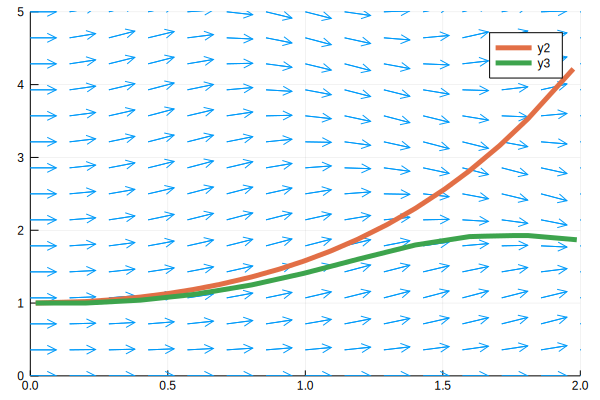

In [51]:
t0, tn, y0 = 0, 2, 1
plot(VectorField((t,y) -> F(y,t)), xlims=(t0,tn), ylims=(0,5), n=15)
plot!(removeO(rhs(out)),  linewidth=5)

u = euler(F, t0, tn, y0, 10)
plot!(u, linewidth=5)

Observar cómo el método de Euler da una mejor aproximación a la solución que el de la solución polinomial. 

Volvamos a la clase para estudiar los errores del método de Euler.